<a href="https://colab.research.google.com/github/deepakpracheta/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Capstone Projects/EDA Project on Hotel Booking/Hotel Bookings.csv")  

In [5]:
#checking first 5 rows
hotel_df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#checking last 5 rows
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
hotel_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [8]:
(hotel_df.isnull().sum()/hotel_df.shape[0]*100).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [9]:
#to know heading of columns in dataset
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
#let's check information of dataset to know datatype of all columns to understand in better way
hotel_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Each row of the dataframe represents a unique customer, and variables are very much self explanatory. Just adr denotes average daily rate paid by the customer and lead_time is the time between booking and visiting the hotel.

In [11]:
#to get quick observation of dataset we have
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Quick observation 37.04 % of the people have cancelled their booking as per the dataset. Avg. lead time is 104 days. Only 3% of the guests are repeated.Average adr is 101.8.

In [20]:
# Before making ay changes to dataset making a copy of our dataset
hotel = hotel_df.copy()

**Missing values**

In [21]:
# getting summary of missing values present in the dataset.
for column in hotel:
  if hotel[column].isnull().any():
    print('{0} column has {1} missing values, which are {2} % of total column'.format(column,hotel[column].isnull().sum(),round(hotel[column].isnull().sum()*100/hotel.shape[0],3)))

children column has 4 missing values, which are 0.003 % of total column
country column has 488 missing values, which are 0.409 % of total column
agent column has 16340 missing values, which are 13.686 % of total column
company column has 112593 missing values, which are 94.307 % of total column


In [22]:
# Dropping this column as most of the data in company column is null almost 94%.
hotel.drop('company',axis=1,inplace=True)

In [15]:
# Creating a function to fill null values with zero in a specific column.
def fill_null(col):
  hotel[col].fillna(0,inplace=True)
  return col

In [ ]:
hotel['agent'] = hotel['agent'].apply(lambda x: fill_null('agent'))
hotel['children'] = hotel['children'].apply(lambda x: fill_null('children'))

In [23]:
#filling null values
hotel['agent'].fillna(0, inplace = True)                               # filling null values of agent with 0
hotel['children'].fillna(hotel['children'].mean(), inplace = True)      #filling null values of children with mean
hotel['country'].fillna('unknown', inplace = True)                     # filling null values of country with 'unknown'

In [24]:
# Checking if all the null values are replaced or not
hotel['agent'].isnull().sum()

0

In [25]:
# Checking if all the null values are replaced or not
hotel['children'].isnull().sum()

0

In [26]:
# Checking if all the null values are replaced or not
hotel['country'].isnull().sum()

0

In [27]:
#dropping those data where total number of adults, children or babies equal to zero.
hotel.drop(hotel.loc[(hotel["adults"] + hotel["children"] + hotel["babies"] == 0)].index, inplace=True)

In [28]:
#dropping those data where total stays_in_weekend_nights and stays_in_week_nights is equal to zero.
hotel.drop(hotel.loc[(hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights'] == 0)].index, inplace=True)

**Converting columns to appropriate datatypes.**

In [29]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'], format = '%Y-%m-%d')

In [30]:
#now let's convert datatype of columns 'children' and 'agent' from float to int.
hotel[['children','agent']]=hotel[['children','agent']].astype(int)

**Removing Outliers from ADR Column**

In [31]:
# Removing Outlier in ADR column
hotel["adr"].iloc[hotel["adr"]<0]=0
hotel.drop(hotel.loc[hotel['adr']==5400].index, inplace=True)
hotel.drop(hotel.loc[hotel['market_segment']=='Undefined'].index, inplace=True)

# Data Cleaning done

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Adding important columns.**

In [32]:
#let's group some columns which can be useful in analysis as grouped element
hotel['total_stay']=hotel['stays_in_weekend_nights']+hotel['stays_in_week_nights']
hotel['total_guests']=hotel['children']+hotel['babies']+hotel['adults']

# **Exploratory Data Analysis**

Now, our dataset is clean and ready-to-use for analysis and visualization.

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest',  'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [34]:
num_data = hotel[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guests']]

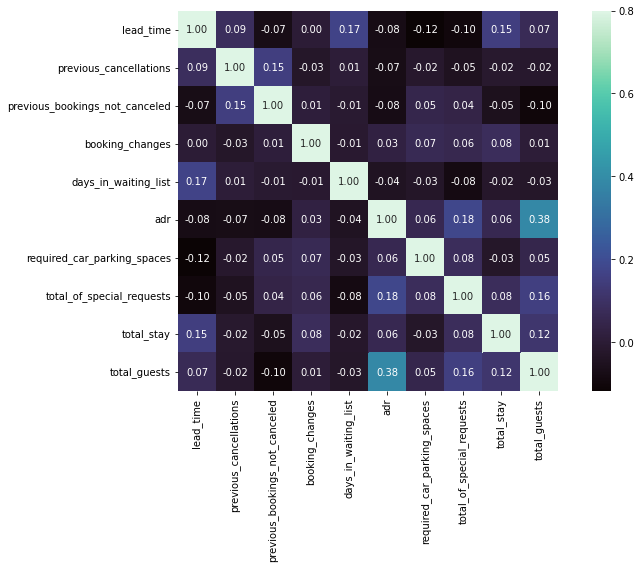

In [35]:
#correlation matrix
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True,cmap ='mako');

In [38]:
# calculating average ADR monthwise.
adr_month=hotel.groupby('arrival_date_month')['adr'].mean().reset_index
adr_month

<bound method Series.reset_index of arrival_date_month
April        100.768322
August       140.771090
December      82.172278
February      74.214769
January       71.051628
July         127.529703
June         117.168883
March         80.770360
May          109.477708
November      74.616630
October       88.671646
September    105.358074
Name: adr, dtype: float64>

In [39]:
# Calculating No.of booking Monthwise.
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

# Confirmed Bookings
confirmed = hotel[hotel['is_canceled']==0]

# arranging hotel bookings according to month index
booking_by_month = confirmed['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month.cloumns = ['Month','Bookings']

In [40]:
# Calculating Average wait_time monthly.
avg_wait = hotel.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
avg_wait

arrival_date_month
January      2.551354
February     0.771568
March        1.388163
April        3.024445
May          4.362953
June         1.963732
July         0.231289
August       0.400652
September    4.233846
October      4.624277
November     1.789333
December     3.011960
Name: days_in_waiting_list, dtype: float64

In [41]:
# Calculating Average lead_time monthly.
avg_lead = hotel.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)
avg_lead

arrival_date_month
January       45.599557
February      48.188672
March         70.555430
April         95.064011
May          118.285885
June         128.561748
July         136.706897
August       121.590587
September    136.940250
October      123.654013
November      77.271156
December      74.199731
Name: lead_time, dtype: float64

In [ ]:
# # multiple line plots
# plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# # show legend
# plt.legend()

# # show graph
# plt.show()

## Month-wise Analysis 

In [42]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [43]:
hotel['adr_pp'] = hotel['adr'] / (hotel['adults'] + hotel['children']+hotel['babies']) 

In [44]:
# calculating average ADR monthwise.
adr_month=round(hotel.groupby('arrival_date_month')['adr'].mean().reindex(month_index),2)

# Calculating No.of booking Monthwise.
# Confirmed Bookings
confirmed = hotel[hotel['is_canceled']==0]
# arranging hotel bookings according to month index
booking_by_month = confirmed['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month.cloumns = ['Month','Bookings']

# Calculating Average wait_time monthly.
avg_wait = hotel.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)


# Calculating Average lead_time monthly.
avg_lead = hotel.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)


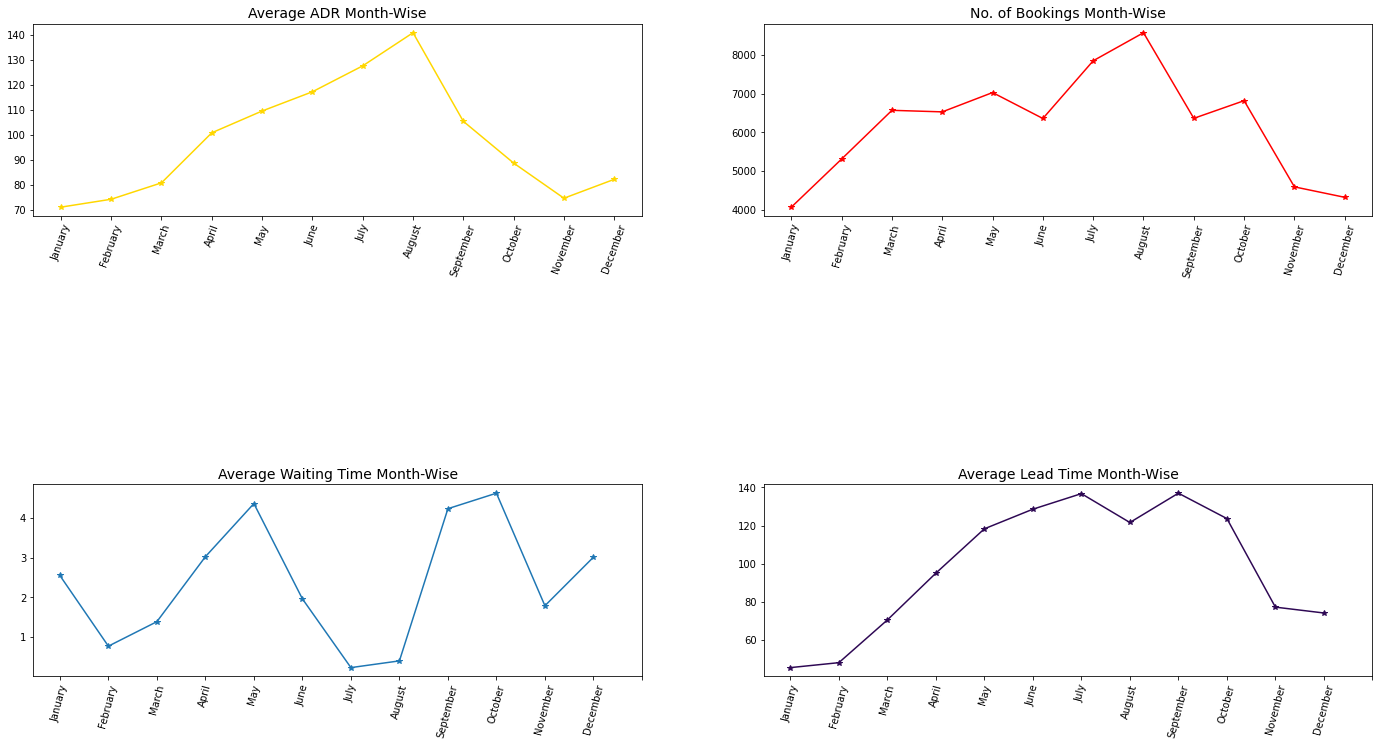

In [45]:
fig = plt.figure(figsize=(24,12))
#  subplot #1
plt.subplot(321)
plt.title('Average ADR Month-Wise', fontsize=14)
plt.plot(adr_month.index,adr_month.values,'-*',color='#FFD700')
plt.xticks(ticks=np.arange(12),labels=adr_month.index, rotation=70)

#  subplot #2
plt.subplot(322)
plt.title('No. of Bookings Month-Wise', fontsize=14)
plt.plot(booking_by_month.index,booking_by_month.values,'-*',color='red')
plt.xticks(ticks=np.arange(12),labels= booking_by_month.index, rotation=75)

#  subplot #3
plt.subplot(325)
plt.title('Average Waiting Time Month-Wise', fontsize=14)
plt.plot(avg_wait.index,avg_wait.values,'-*')
plt.xticks(ticks=np.arange(13),labels=avg_wait.index, rotation=75)

#  subplot #4
plt.subplot(326)
plt.title('Average Lead Time Month-Wise', fontsize=14)
plt.plot(avg_lead.index,avg_lead.values,'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels=avg_lead.index, rotation=75)

plt.show()

##Optimal stay length

In [46]:
# What is the Optimal stay length in both type of hotels ?

In [47]:
hotel.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_guests,adr_pp
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,75.0


In [48]:
(hotel[hotel['total_stay']==1]).count()

hotel                             21003
is_canceled                       21003
lead_time                         21003
arrival_date_year                 21003
arrival_date_month                21003
arrival_date_week_number          21003
arrival_date_day_of_month         21003
stays_in_weekend_nights           21003
stays_in_week_nights              21003
adults                            21003
children                          21003
babies                            21003
meal                              21003
country                           21003
market_segment                    21003
distribution_channel              21003
is_repeated_guest                 21003
previous_cancellations            21003
previous_bookings_not_canceled    21003
reserved_room_type                21003
assigned_room_type                21003
booking_changes                   21003
deposit_type                      21003
agent                             21003
days_in_waiting_list              21003


In [49]:
stay=hotel.groupby(['total_stay','hotel']).agg("count").reset_index()

In [50]:
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_stay,hotel,Number of stays
0,1,City Hotel,13256
1,1,Resort Hotel,7747
2,2,City Hotel,21414
3,2,Resort Hotel,6217
4,3,City Hotel,21371
...,...,...,...
66,46,Resort Hotel,1
67,48,City Hotel,1
68,56,Resort Hotel,2
69,60,Resort Hotel,1


Text(0.5, 0, 'total_stay(days)')

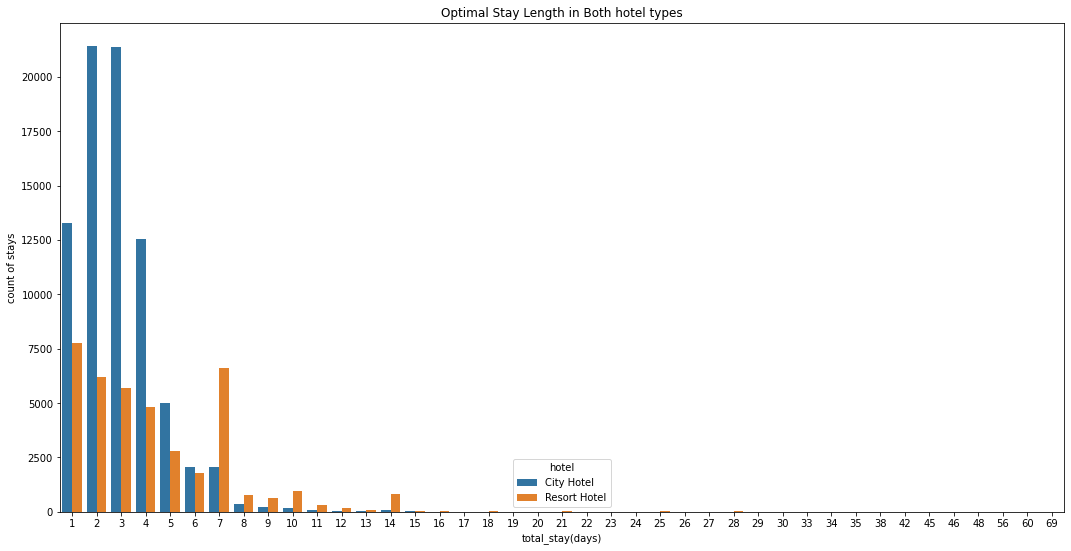

In [51]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'total_stay', y = 'Number of stays',data= stay,hue='hotel')

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

## Month-wise Analysis But Hotel Wise

In [54]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
hotel['total_occ'] = hotel['children']+hotel['babies']+hotel['adults']
hotel['adr_pp'] = hotel['adr'] / hotel['total_occ'] 

In [56]:
# Finding Total Revenue Generated Monthwise City Hotel
x_city= hotel[hotel['hotel']=='City Hotel']
x_city= x_city.groupby(['arrival_date_month'])['adr_pp'].sum().reindex(month_index)
x_city=pd.DataFrame(x_city)
x_city.head(12)


# Finding Total Revenue Generated Monthwise For Resorts
x_resort= hotel[hotel['hotel']=='Resort Hotel']
x_resort= x_resort.groupby(['arrival_date_month'])['adr_pp'].sum().reindex(month_index)
x_resort=pd.DataFrame(x_resort)
x_resort.head(12)

,adr_pp
arrival_date_month,
January,67839.015000
February,94203.263333
March,111852.730000
April,154220.802833
May,149452.024000
June,168754.539667
July,327341.707667
August,414721.228000
September,151345.908333


In [57]:
# Finding total Number of Bookings Made Monthwise City Hotel
z_city= hotel[hotel['hotel']=='City Hotel']
z_city= z_city.groupby(['arrival_date_month']).count().reindex(month_index)
z_city=z_city.iloc[:,[0]]
z_city=z_city.rename(columns={'hotel':'bookings'})
z_city.head(12)


# Finding total Number of Bookings Made Monthwise For Resorts
z_resort= hotel[hotel['hotel']=='Resort Hotel']
z_resort= z_resort.groupby(['arrival_date_month']).count().reindex(month_index)
# z = pd.DataFrame(z)
# z=z.rename(columns={'arrival_date_month':'bookings'})
z_resort=z_resort.iloc[:,[0]]
z_resort=z_resort.rename(columns={'hotel':'bookings'})
z_resort.head(12)

,bookings
arrival_date_month,
January,2159
February,3081
March,3305
April,3587
May,3520
June,3017
July,4532
August,4860
September,3100


In [58]:
# Merging Three Data Frames For City Hotel
xyz_city = pd.concat([x_city,z_city], axis=1)
# Now Finding Monthly avg rate per person
xyz_city['avg_cost'] = xyz_city['adr_pp']/xyz_city['bookings']
xyz_city.head(12)



# Merging Three Data Frames For Resort
xyz_resort = pd.concat([x_resort, z_resort], axis=1)
# Now Finding Monthly avg rate per person
xyz_resort['avg_cost'] = xyz_resort['adr_pp']/xyz_resort['bookings']
xyz_resort.head(12)

,adr_pp,bookings,avg_cost
arrival_date_month,,,
January,67839.015000,2159,31.421498
February,94203.263333,3081,30.575548
March,111852.730000,3305,33.843489
April,154220.802833,3587,42.994369
May,149452.024000,3520,42.457961
June,168754.539667,3017,55.934551
July,327341.707667,4532,72.228973
August,414721.228000,4860,85.333586
September,151345.908333,3100,48.821261


In [59]:
# Calculating Average wait_time monthly for City Hotel
wait_city = hotel[hotel['hotel']=='City Hotel']
wait_city = wait_city.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
wait_city = pd.DataFrame(wait_city)
print(wait_city.head(12))


# Calculating Average wait_time monthly for Resort
wait_resort = hotel[hotel['hotel']=='Resort Hotel']
wait_resort = wait_resort.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
wait_resort = pd.DataFrame(wait_resort)
print(wait_resort.head(12))

                    days_in_waiting_list
arrival_date_month                      
January                         4.008082
February                        1.127924
March                           1.846646
April                           4.327836
May                             6.185484
June                            2.524384
July                            0.359945
August                          0.618212
September                       6.013013
October                         5.864310
November                        2.352518
December                        3.283622
                    days_in_waiting_list
arrival_date_month                      
January                         0.046781
February                        0.202856
March                           0.498941
April                           0.314469
May                             0.125568
June                            0.500497
July                            0.002648
August                          0.000000
September       

In [60]:
# Calculating Average lead_time monthly for City Hotel
lead_city = hotel[hotel['hotel']=='City Hotel']
lead_city = lead_city.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)
lead_city = pd.DataFrame(lead_city)
print(lead_city.head(12))


# Calculating Average lead_time monthly for Resort Hotel
lead_resort = hotel[hotel['hotel']=='Resort Hotel']
lead_resort = lead_resort.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)
lead_resort = pd.DataFrame(lead_resort)
print(lead_resort.head(12))

                     lead_time
arrival_date_month            
January              56.900054
February             53.212935
March                73.627769
April                99.308394
May                 116.766740
June                124.486665
July                153.924882
August              131.150615
September           128.080385
October             126.547524
November             94.858900
December             85.279473
                     lead_time
arrival_date_month            
January              26.170449
February             40.170399
March                64.596672
April                86.239197
May                 121.817898
June                139.197216
July                106.108120
August              103.985185
September           158.023871
October             117.426781
November             45.733250
December             56.686728


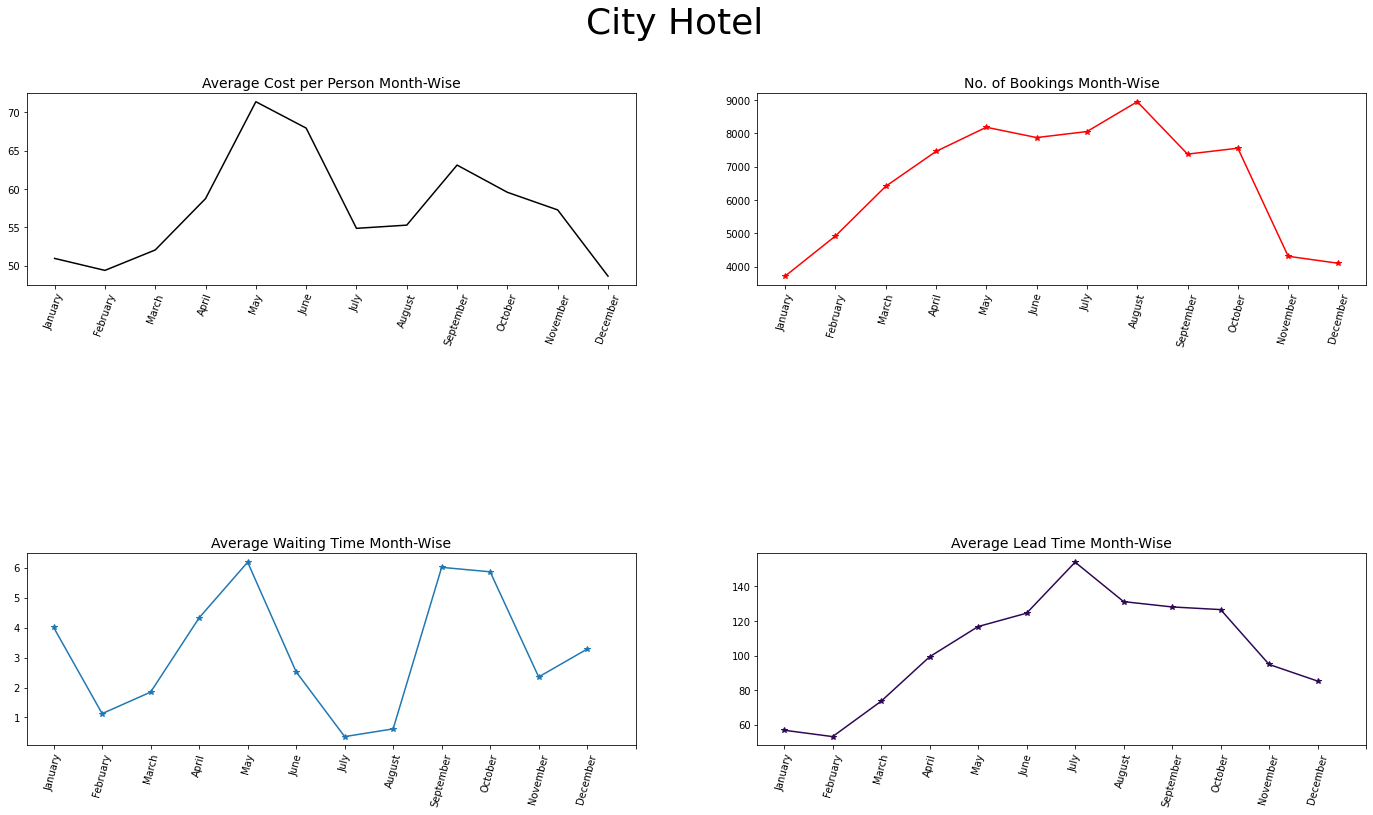

In [61]:
fig = plt.figure(figsize=(24,12))
plt.suptitle('City Hotel', fontsize=36)
# sgtitle('Subplot Grid Title', fontsize=24)
#  subplot #1
plt.subplot(321)
plt.title('Average Cost per Person Month-Wise', fontsize=14)
plt.plot(xyz_city.index,xyz_city['avg_cost'],color='black', label = 'City Hotel')
plt.xticks(ticks=np.arange(12),labels=xyz_city.index, rotation=70)

#  subplot #2
plt.subplot(322)
plt.title('No. of Bookings Month-Wise', fontsize=14)
plt.plot(xyz_city.index,xyz_city['bookings'],'-*',color='red')
plt.xticks(ticks=np.arange(12),labels= xyz_city.index, rotation=75)

#  subplot #3
plt.subplot(325)
plt.title('Average Waiting Time Month-Wise', fontsize=14)
plt.plot(wait_city.index,wait_city['days_in_waiting_list'],'-*')
plt.xticks(ticks=np.arange(13),labels=wait_city.index, rotation=75)

#  subplot #4
plt.subplot(326)
plt.title('Average Lead Time Month-Wise', fontsize=14)
plt.plot(lead_city.index,lead_city.values,'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels=lead_city.index, rotation=75)

plt.show()

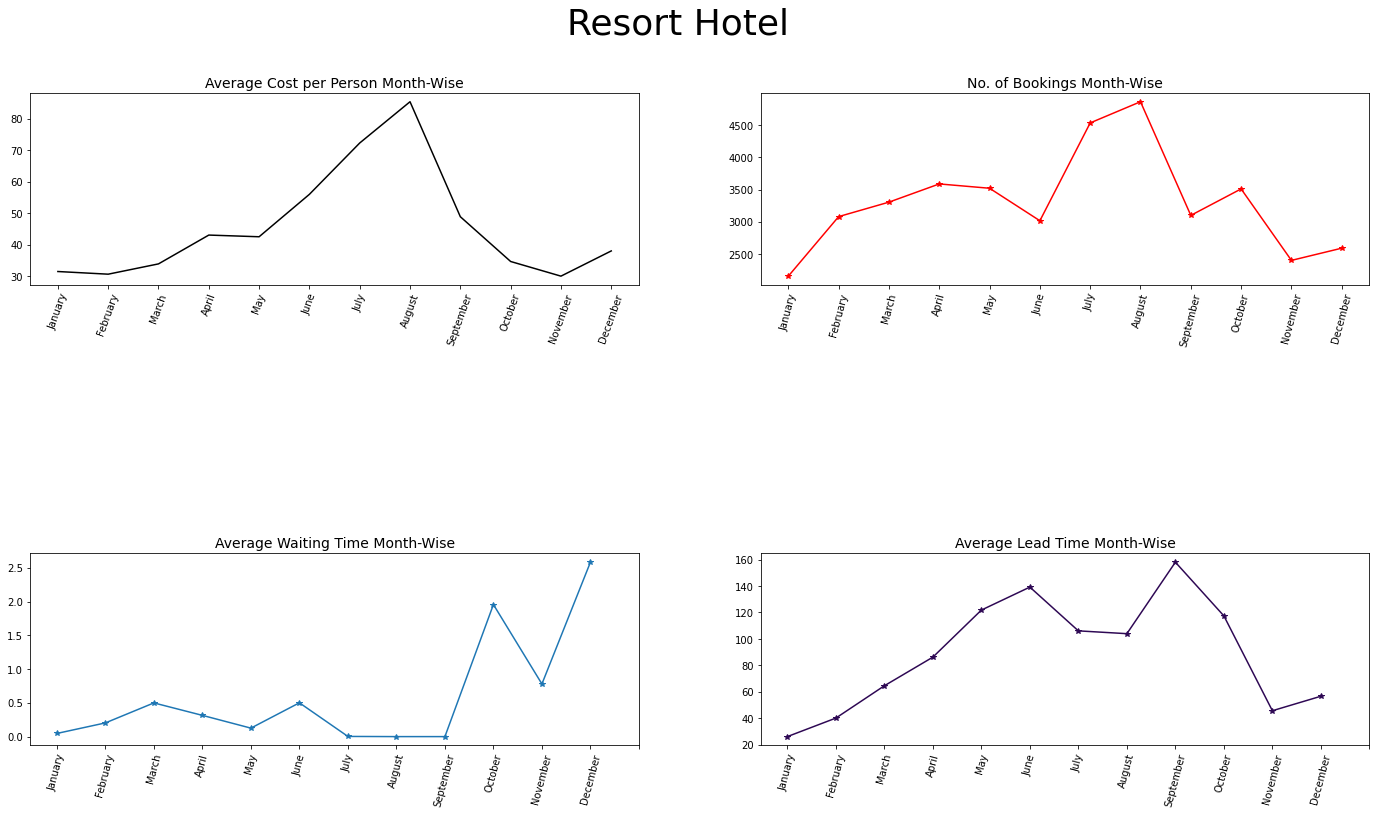

In [62]:
fig = plt.figure(figsize=(24,12))
plt.suptitle('Resort Hotel', fontsize=36)
#  subplot #1
plt.subplot(321)
plt.title('Average Cost per Person Month-Wise', fontsize=14)
plt.plot(xyz_resort.index,xyz_resort['avg_cost'],color='black', label = 'Resort Hotel')
plt.xticks(ticks=np.arange(12),labels=xyz_resort.index, rotation=70)

#  subplot #2
plt.subplot(322)
plt.title('No. of Bookings Month-Wise', fontsize=14)
plt.plot(xyz_resort.index,xyz_resort['bookings'],'-*',color='red')
plt.xticks(ticks=np.arange(12),labels= xyz_resort.index, rotation=75)

#  subplot #3
plt.subplot(325)
plt.title('Average Waiting Time Month-Wise', fontsize=14)
plt.plot(wait_resort.index,wait_resort['days_in_waiting_list'],'-*')
plt.xticks(ticks=np.arange(13),labels=wait_resort.index, rotation=75)

#  subplot #4
plt.subplot(326)
plt.title('Average Lead Time Month-Wise', fontsize=14)
plt.plot(lead_resort.index,lead_resort.values,'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels=lead_resort.index, rotation=75)

plt.show()

## Which meal type is most preferred meal of customers?

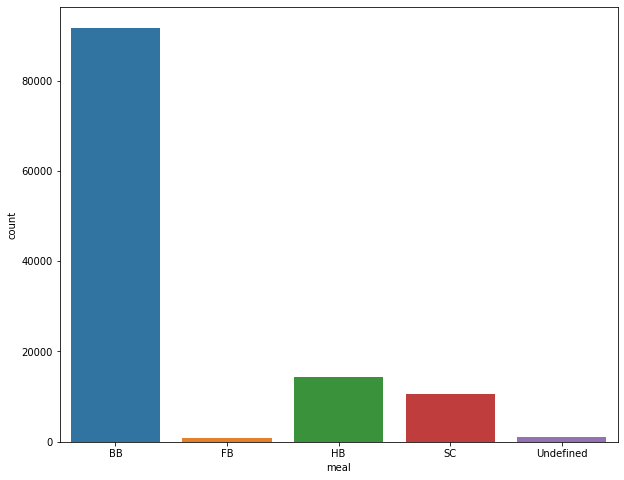

In [63]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hotel['meal'])
plt.show()